In [44]:
from PIL import Image, ImageOps
import numpy as np
import cv2
from utils import create_mask

In [60]:
image = Image.open("room.jpg")
mask = create_mask(np.array(Image.open("mask.png")), (204, 5, 255))

Square bbox

In [ ]:
def create_reference_images(image, mask, min_size=200, padding=30):
    # Create square bounding box
    bbox = mask.getbbox()
    center = (bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3]) // 2
    width, height = bbox[2] - bbox[0], bbox[3] - bbox[1]
    size = max(width, height) + padding
    size = max(size, min_size)
    mask_bbox = (center[0] - size // 2, center[1] - size // 2, center[0] + size // 2, center[1] + size // 2)

    if (mask_bbox[0] < 0):
        mask_bbox = (0, mask_bbox[1], mask_bbox[2] - mask_bbox[0], mask_bbox[3])
    if (mask_bbox[1] < 0):
        new_bbox = (mask_bbox[0], 0, mask_bbox[2], mask_bbox[3] - mask_bbox[1])
    if (new_bbox[2] > mask.width):
        diff = new_bbox[2] - mask.width
        new_bbox = (mask_bbox[0] - diff, mask_bbox[1], mask.width, mask_bbox[3])
    if (mask_bbox[3] > mask.height):
        diff = mask_bbox[3] - mask.height
        mask_bbox = (mask_bbox[0], mask_bbox[1] - diff, mask_bbox[2], mask.height)
    
    image_bbox = tuple([int(x * image.width/mask.width) for x in mask_bbox])

    return image.crop(image_bbox), mask.crop(mask_bbox), image_bbox, mask_bbox

In [95]:
bbox = mask.getbbox()
center = (bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3]) // 2
width, height = bbox[2] - bbox[0], bbox[3] - bbox[1]
size = max(width, height) + 30
size = max(size, 200)
mask_bbox = (center[0] - size // 2, center[1] - size // 2, center[0] + size // 2, center[1] + size // 2)

if (mask_bbox[0] < 0):
    mask_bbox = (0, mask_bbox[1], mask_bbox[2] - mask_bbox[0], mask_bbox[3]) ##
if (mask_bbox[1] < 0):
    new_bbox = (mask_bbox[0], 0, mask_bbox[2], mask_bbox[3] - mask_bbox[1])
if (new_bbox[2] > mask.width):
    diff = new_bbox[2] - mask.width
    new_bbox = (mask_bbox[0] - diff, mask_bbox[1], mask.width, mask_bbox[3])
if (mask_bbox[3] > mask.height):
    diff = mask_bbox[3] - mask.height
    mask_bbox = (mask_bbox[0], mask_bbox[1] - diff, mask_bbox[2], mask.height)

Dynamic bbox

In [74]:
bbox = mask.getbbox()
bbox_width = bbox[2] - bbox[0]
bbox_height = bbox[3] - bbox[1]
bbox_size = max(bbox_width, bbox_height)
bbox = (bbox[0], bbox[1], bbox[0] + bbox_size, bbox[1] + bbox_size)

p = 20

mask_bbox = (bbox[0] - p, bbox[1] - p, bbox[2] + p, bbox[3] + p)

In [96]:
image_bbox = tuple([int(x * image.width/mask.width) for x in mask_bbox])

In [97]:
image_ref = image.crop(image_bbox)
mask_ref = mask.crop(mask_bbox)

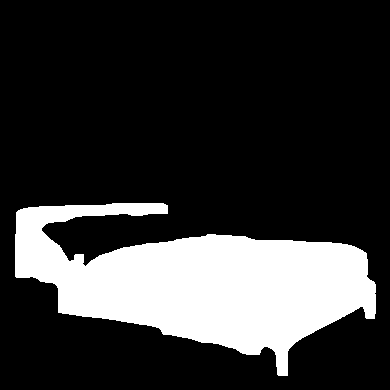

In [99]:
mask_ref

Dummy processing

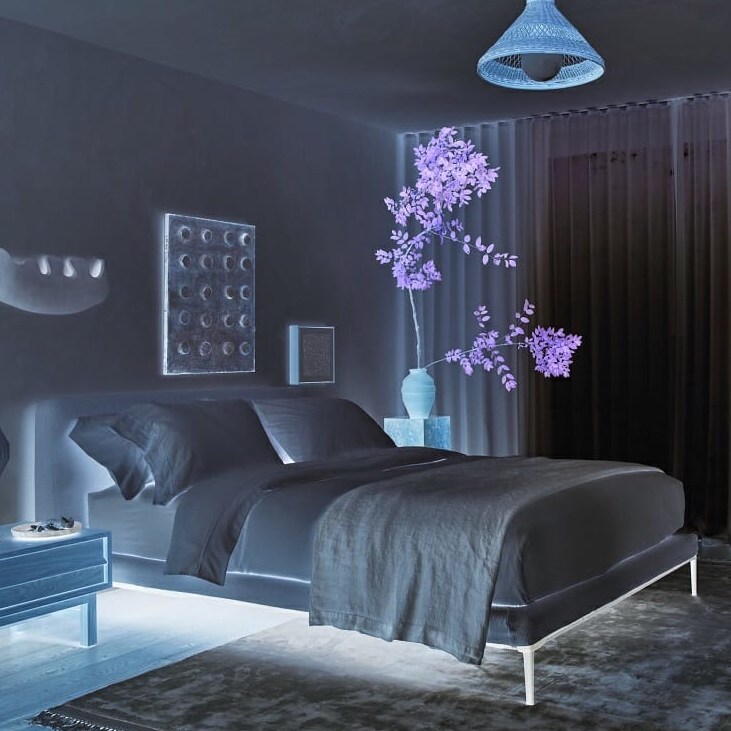

In [100]:
image_processed = ImageOps.invert(image_ref)
image_processed

In [101]:
copy = image.copy()
paste_mask = mask_ref.resize(image_ref.size).convert("L")
copy.paste(image_processed, image_bbox, paste_mask)

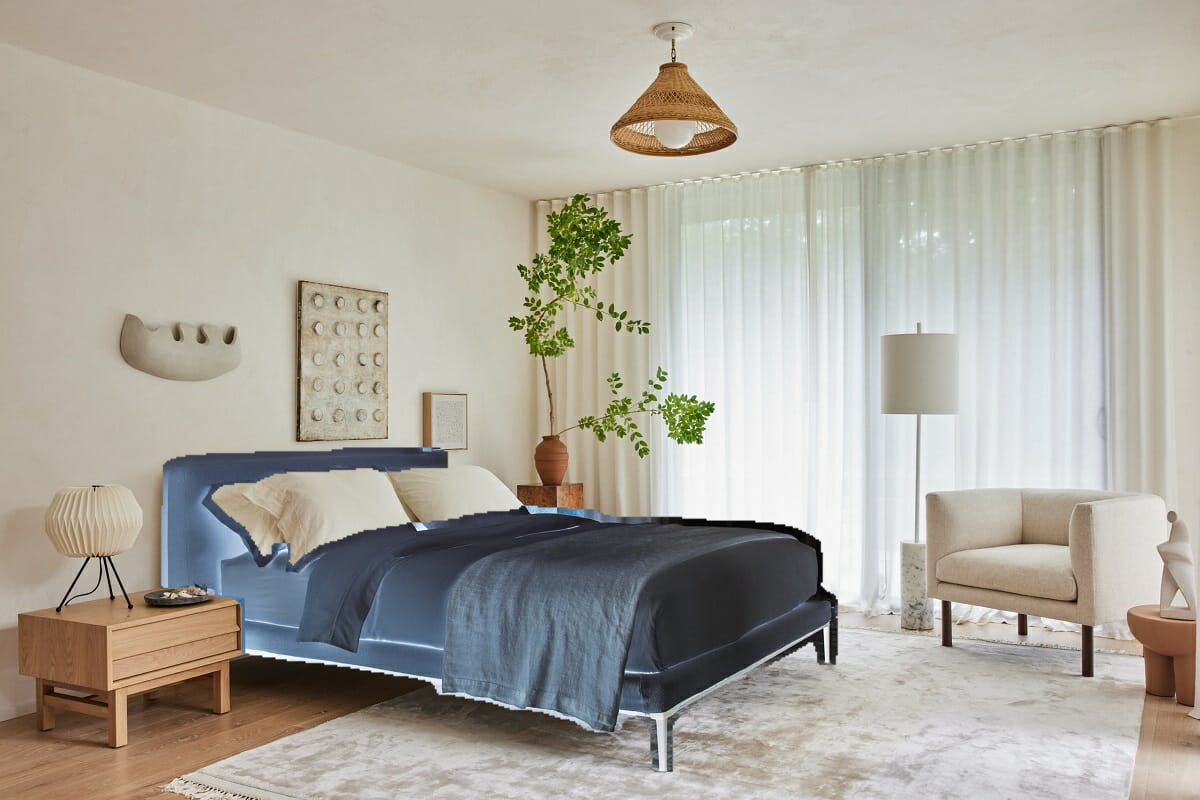

In [103]:
copy